In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from numpy import mean
from numpy import std
from numpy import absolute
from libpysal.weights.contiguity import Queen
import libpysal
from statsmodels.api import OLS
sns.set_style('white')

In [2]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\CodeSprints\\Regression'

In [3]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [4]:
# Read S2 dataset 
Data1 = pd.read_csv('data_raw/Indices/S2Data.csv')

# Remove none values
S2Data = Data1.dropna()

# Display the first few rows of our DataFrame
S2Data.head()
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956879 -0.044137 -0.022070  0.117900  0.002955   
1      2016      5    7  0.956959 -0.043948 -0.022029  0.117907  0.002955   
2      2016      5    7  1.015101  0.016830  0.007469  0.147959  0.008728   
3      2016      5    7  0.991688 -0.008969 -0.004225  0.142645  0.007528   
4      2016      5    7  0.881265 -0.110070 -0.063161  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.854190 -0.129064 -0.078726  0.152807  0.001676   
35029  2020     10   30  1.077379  0.065607  0.035775  0.126659  0.001469   
35030  2020     10   30  0.946243 -0.050380 -0.027911  0.134852  0.007321   
35031  2020     10   30  0.962221 -0.039201 -0.019493  0.132445  0.007393   
35032  2020     10   30  0.960195 -0.038782 -0.020508  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [5]:
# Read Field dataset 
Data2 = pd.read_csv('data_raw/Indices/FieldData.csv')

# Remove none values
FieldData = Data2.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(FieldData)

             Lake Name          Y          X       Date  Year  Month  Day  \
0     Little Long Pond  40.977600 -72.296204   6/4/2016  2016      6    4   
1       Cossayuna Lake  43.200600 -73.423401   6/3/2016  2016      6    3   
2           Hatch Lake  42.834598 -75.677803   6/5/2016  2016      6    5   
3      Montgomery Lake  41.525299 -74.917297   6/4/2016  2016      6    4   
4        Lake Devenoge  41.521000 -74.839401   6/4/2016  2016      6    4   
...                ...        ...        ...        ...   ...    ...  ...   
6070         Long Pond  40.975102 -72.290802  7/26/2020  2020      7   26   
6071         Long Pond  40.975102 -72.290802   8/9/2020  2020      8    9   
6072         Long Pond  40.975102 -72.290802  8/23/2020  2020      8   23   
6073         Long Pond  40.975102 -72.290802   9/7/2020  2020      9    7   
6074         Long Pond  40.975102 -72.290802  9/20/2020  2020      9   20   

       Chl-a  
0      1.200  
1      0.600  
2      2.900  
3      2.900  


In [6]:
# Using merge function by setting how='inner'
MergedData = pd.merge(S2Data, FieldData, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
MergedData.to_csv('data_output/Threshold/MergedData.csv')
  
# displaying result
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B6        B7        B8       B8A  \
0     0.012669

In [7]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,1487.000000,1487.000000,1487.000000,1487.000000
mean,0.995474,0.015297,-0.005038,10.526351
std,0.132150,0.191915,0.054806,18.258538
min,0.406412,-0.183174,-0.113502,0.050000
25%,0.916918,-0.093031,-0.042380,1.900000
50%,0.966684,-0.035932,-0.016578,3.900000
75%,1.048701,0.067505,0.023032,9.992000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


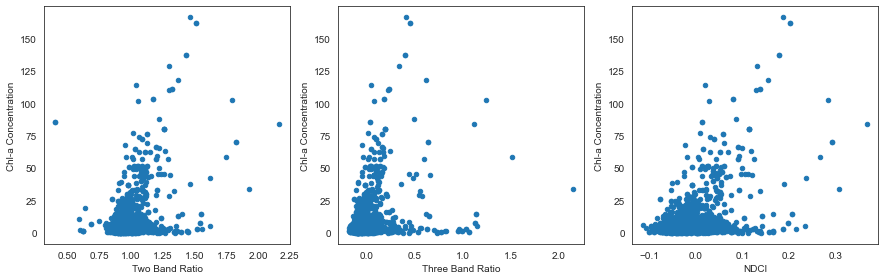

0.4000614611071748 0.28917515561718177 0.44219761482571174


In [8]:
# Scatterplot for Chl-a vs all variables

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData['2BDA'].values, MergedData['Chl-a'].values)[0,1]

MergedData[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData['3BDA'].values, MergedData['Chl-a'].values)[0,1]

MergedData[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData['NDCI'].values, MergedData['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [9]:
# Pearson Coefficient 
MergedData[['2BDA', '3BDA', 'NDCI', 'Chl-a']].corr(method='pearson')

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.901674,0.947186,0.400061
3BDA,0.901674,1.000000,0.912430,0.289175
NDCI,0.947186,0.912430,1.000000,0.442198
Chl-a,0.400061,0.289175,0.442198,1.000000


In [10]:
# Pearson Coefficient 
MergedData[['2BDA', '3BDA', 'NDCI', 'Chl-a']].corr(method='spearman')

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.970467,0.976571,0.242132
3BDA,0.970467,1.000000,0.992645,0.254440
NDCI,0.976571,0.992645,1.000000,0.249792
Chl-a,0.242132,0.254440,0.249792,1.000000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Chl-a'>

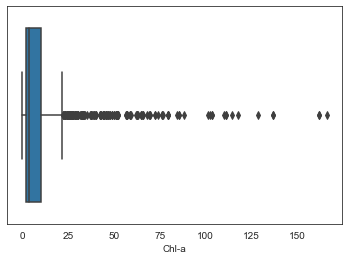

In [11]:
sns.boxplot(MergedData['Chl-a'])

In [12]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = MergedData["Chl-a"]

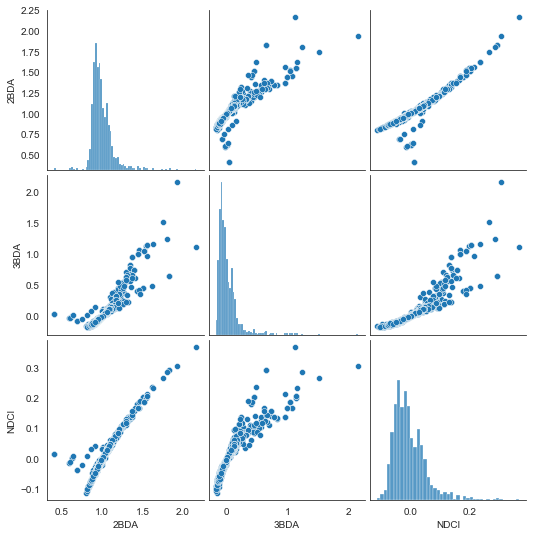

In [13]:
# Use seaborn.pairplot to plot a scatterplot matrix of independent variables (X)
sns.pairplot(MergedData[X_columns])

In [14]:
?variance_inflation_factor

In [15]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(MergedData[X_columns[0:3]].values, i) for i in range(MergedData[X_columns[0:3]].shape[1])]
vif["features"] = MergedData[X_columns[0:3]].columns

In [16]:
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,6.0,3BDA
2,6.0,NDCI


In [17]:
#OLS model based on Three predictors (2BDA,3BDA,NDCI)
# Extract independent variables (predictors) 
X = MergedData[X_columns]

# Extract dependent variable (prediction)
Y = MergedData['Chl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Chl-a   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              413.3
Date:                Mon, 14 Feb 2022   Prob (F-statistic):                   4.14e-195
Time:                        11:13:13   Log-Likelihood:                         -6190.6
No. Observations:                1487   AIC:                                  1.239e+04
Df Residuals:                    1484   BIC:                                  1.240e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
X = MergedData[X_columns]
Y = MergedData['Chl-a']

model = OLS(Y, X)
results = OLS(Y, X).fit()

# prediction
MergedData['Yhat1'] = results.predict(X)
print('predicted Y:', MergedData['Yhat1'])
print('original Y:', Y)

predicted Y: 0        7.679165
1        7.679165
2        9.722356
3        9.722356
4       10.641788
          ...    
1482    13.859161
1483    11.806257
1484     7.407628
1485     1.729101
1486    18.343923
Name: Yhat1, Length: 1487, dtype: float64
original Y: 0       8.1000
1       8.1000
2       0.7000
3       0.7000
4       4.0000
         ...  
1482    0.2898
1483    2.8560
1484    7.3620
1485    3.4640
1486    3.2140
Name: Chl-a, Length: 1487, dtype: float64


In [19]:
mae = metrics.mean_absolute_error(Y, MergedData['Yhat1'])
print("MAE:",mae)

MAE: 10.218305113125215


In [20]:
# MergedData: Threshold Chl-a=0.4
MergedData2 = MergedData.loc[(MergedData["Chl-a"] > 0.4)]
MergedData2.shape

(1455, 25)

In [21]:
# Descriptive statistics of all variables: Threshold Chl-a=0.4
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData2 [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,1455.000000,1455.000000,1455.000000,1455.000000
mean,0.995531,0.015389,-0.004980,10.753637
std,0.132538,0.192103,0.054887,18.393171
min,0.406412,-0.183174,-0.113502,0.403200
25%,0.916918,-0.092965,-0.042233,1.958600
50%,0.967510,-0.035393,-0.016399,4.036000
75%,1.049181,0.067732,0.023215,10.200000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


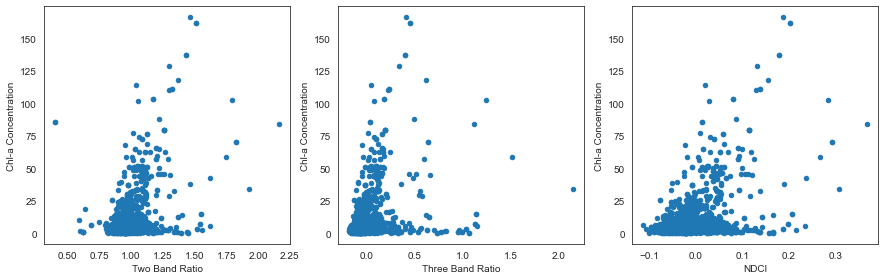

0.4044364056375403 0.2928153245123734 0.4473431786502586


In [22]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=0.4

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData2[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData2['2BDA'].values, MergedData2['Chl-a'].values)[0,1]

MergedData2[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData2['3BDA'].values, MergedData2['Chl-a'].values)[0,1]

MergedData2[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData2['NDCI'].values, MergedData2['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [23]:
# Pearson Coefficient Threshold = 0.4
MergedData2[['2BDA', '3BDA', 'NDCI', 'Chl-a']].corr(method='pearson')

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.900537,0.946401,0.404436
3BDA,0.900537,1.000000,0.911648,0.292815
NDCI,0.946401,0.911648,1.000000,0.447343
Chl-a,0.404436,0.292815,0.447343,1.000000


In [24]:
# Pearson Coefficient 
MergedData2[['2BDA', '3BDA', 'NDCI', 'Chl-a']].corr(method='spearman')

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.970027,0.976186,0.250122
3BDA,0.970027,1.000000,0.992628,0.261914
NDCI,0.976186,0.992628,1.000000,0.257169
Chl-a,0.250122,0.261914,0.257169,1.000000


In [25]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = MergedData2["Chl-a"]

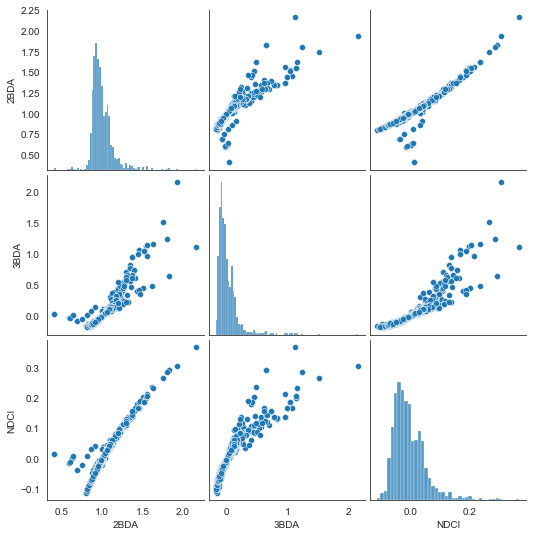

In [26]:
# Use seaborn.pairplot to plot a scatterplot matrix of independent variables (X)
sns.pairplot(MergedData2[X_columns])

In [27]:
?variance_inflation_factor

In [28]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(MergedData2[X_columns[0:3]].values, i) for i in range(MergedData2[X_columns[0:3]].shape[1])]
vif["features"] = MergedData2[X_columns[0:3]].columns

In [29]:
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,6.0,3BDA
2,6.0,NDCI


In [30]:
#OLS model based on Three predictors (2BDA,3BDA,NDCI)/Threshold = 0.4
# Extract independent variables (predictors) 
X = MergedData2[X_columns]

# Extract dependent variable (prediction)
Y = MergedData2['Chl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Chl-a   R-squared (uncentered):                   0.463
Model:                            OLS   Adj. R-squared (uncentered):              0.462
Method:                 Least Squares   F-statistic:                              416.7
Date:                Mon, 14 Feb 2022   Prob (F-statistic):                   3.08e-195
Time:                        11:13:41   Log-Likelihood:                         -6063.2
No. Observations:                1455   AIC:                                  1.213e+04
Df Residuals:                    1452   BIC:                                  1.215e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
X = MergedData2[X_columns]
Y = MergedData2['Chl-a']

model = OLS(Y, X)
results = OLS(Y, X).fit()

# prediction
MergedData2['Yhat1'] = results.predict(X)
print('predicted Y:', MergedData2['Yhat1'])
print('original Y:', Y)

predicted Y: 0        7.847198
1        7.847198
2        9.902051
3        9.902051
4       10.842506
          ...    
1480    20.817712
1483    12.020073
1484     7.571597
1485     1.832832
1486    18.642338
Name: Yhat1, Length: 1455, dtype: float64
original Y: 0        8.100
1        8.100
2        0.700
3        0.700
4        4.000
         ...  
1480    35.140
1483     2.856
1484     7.362
1485     3.464
1486     3.214
Name: Chl-a, Length: 1455, dtype: float64


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
mae = metrics.mean_absolute_error(Y, MergedData2['Yhat1'])
print("MAE:",mae)

MAE: 10.294938367140288


In [73]:
# MergedData: Threshold Chl-a=2
MergedData3 = MergedData.loc[(MergedData["Chl-a"] > 2)]
MergedData3.shape

(1082, 25)

In [74]:
# Descriptive statistics of all variables: Threshold Chl-a=2
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData3 [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,1082.000000,1082.000000,1082.000000,1082.000000
mean,1.003148,0.021406,-0.001436,14.006122
std,0.136958,0.188871,0.056143,20.339084
min,0.406412,-0.181705,-0.113502,2.008000
25%,0.921132,-0.088717,-0.040431,3.400000
50%,0.975644,-0.026701,-0.012293,6.200000
75%,1.059886,0.075093,0.028449,14.215500
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


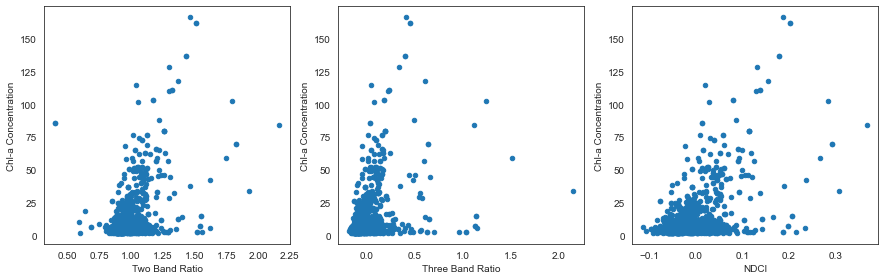

0.44174220767305167 0.343008159986595 0.4929219293631562


In [75]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=2

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData3[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData3['2BDA'].values, MergedData3['Chl-a'].values)[0,1]

MergedData3[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData3['3BDA'].values, MergedData3['Chl-a'].values)[0,1]

MergedData3[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData3['NDCI'].values, MergedData3['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [76]:
# MergedData: Threshold Chl-a=8
MergedData4 = MergedData.loc[(MergedData["Chl-a"] > 8)]
MergedData4.shape

(441, 25)

In [77]:
# Descriptive statistics of all variables: Threshold Chl-a=8
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData4 [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,441.000000,441.000000,441.000000,441.000000
mean,1.043218,0.067900,0.018056,28.307474
std,0.164171,0.216030,0.062199,25.814390
min,0.406412,-0.141255,-0.084683,8.068000
25%,0.953789,-0.046473,-0.022685,11.556000
50%,1.012558,0.019506,0.006901,18.546000
75%,1.090054,0.113746,0.042312,35.140000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


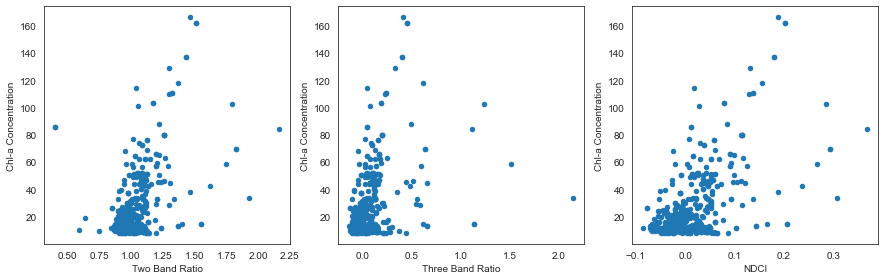

0.4883782086851146 0.3810507231008048 0.5725302658433965


In [78]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=8

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData4[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData4['2BDA'].values, MergedData4['Chl-a'].values)[0,1]

MergedData4[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData4['3BDA'].values, MergedData4['Chl-a'].values)[0,1]

MergedData4[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData4['NDCI'].values, MergedData4['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [39]:
# MergedData: Threshold Chl-a=15
MergedData5 = MergedData.loc[(MergedData["Chl-a"] > 15)]
MergedData5.shape

(263, 25)

In [40]:
# Descriptive statistics of all variables: Threshold Chl-a=15
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData5 [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,263.000000,263.000000,263.000000,263.000000
mean,1.070563,0.093575,0.030373,40.127802
std,0.186278,0.235939,0.067864,27.733767
min,0.406412,-0.135845,-0.078095,15.060000
25%,0.973639,-0.020724,-0.010553,20.620000
50%,1.036768,0.038963,0.017265,30.140000
75%,1.112373,0.126308,0.052173,50.300000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


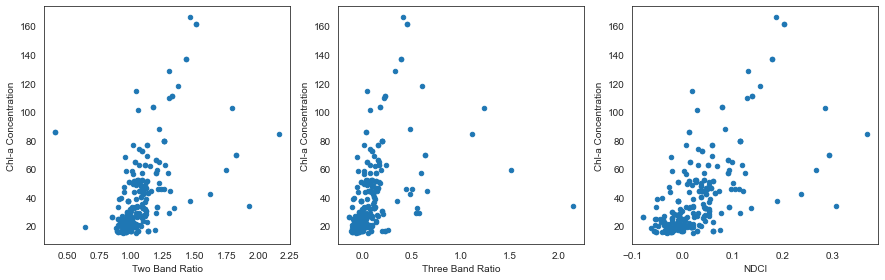

0.5133972587341751 0.4249963102433628 0.6252614001212314


In [41]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=15

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData5[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData5['2BDA'].values, MergedData5['Chl-a'].values)[0,1]

MergedData5[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData5['3BDA'].values, MergedData5['Chl-a'].values)[0,1]

MergedData5[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData5['NDCI'].values, MergedData5['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [42]:
# MergedData: Threshold Chl-a=20
MergedData6 = MergedData.loc[(MergedData["Chl-a"] > 20)]
MergedData6.shape

(205, 25)

In [43]:
# Descriptive statistics of all variables: Threshold Chl-a=20
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData6 [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,205.000000,205.000000,205.000000,205.000000
mean,1.096930,0.122213,0.041685,46.593112
std,0.199346,0.256608,0.071244,28.228859
min,0.406412,-0.135845,-0.078095,20.060000
25%,0.987161,-0.014331,-0.006393,26.060000
50%,1.066638,0.071743,0.031036,38.920000
75%,1.127745,0.146439,0.058011,56.680000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


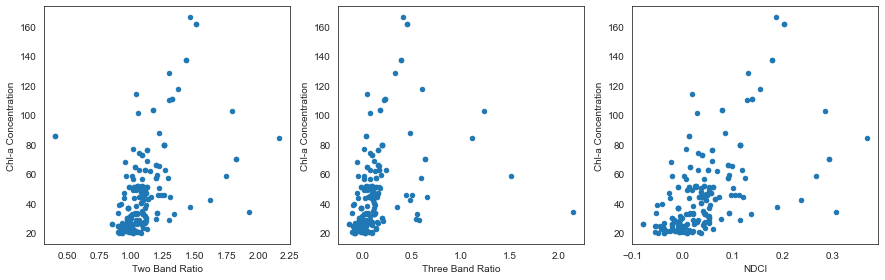

0.4668354450619797 0.37579583985028897 0.5843496586705526


In [44]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=20

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData6[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData6['2BDA'].values, MergedData6['Chl-a'].values)[0,1]

MergedData6[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData6['3BDA'].values, MergedData6['Chl-a'].values)[0,1]

MergedData6[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData6['NDCI'].values, MergedData6['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [89]:
# Pearson Coefficient 
MergedData4[['2BDA', '3BDA', 'NDCI', 'Chl-a']].corr(method='pearson')

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.866738,0.939276,0.488378
3BDA,0.866738,1.000000,0.886099,0.381051
NDCI,0.939276,0.886099,1.000000,0.572530
Chl-a,0.488378,0.381051,0.572530,1.000000


In [90]:
# Pearson Coefficient 
MergedData4[['2BDA', '3BDA', 'NDCI', 'Chl-a']].corr(method='spearman')

,2BDA,3BDA,NDCI,Chl-a
2BDA,1.000000,0.969737,0.980139,0.423369
3BDA,0.969737,1.000000,0.989658,0.392447
NDCI,0.980139,0.989658,1.000000,0.433491
Chl-a,0.423369,0.392447,0.433491,1.000000


In [91]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = MergedData4["Chl-a"]

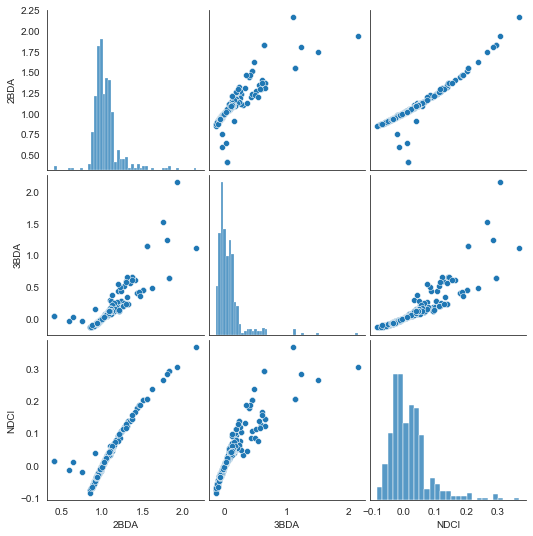

In [92]:
# Use seaborn.pairplot to plot a scatterplot matrix of independent variables (X)
sns.pairplot(MergedData4[X_columns])

In [93]:
?variance_inflation_factor

In [94]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(MergedData4[X_columns[0:3]].values, i) for i in range(MergedData4[X_columns[0:3]].shape[1])]
vif["features"] = MergedData4[X_columns[0:3]].columns

In [95]:
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,5.0,3BDA
2,5.0,NDCI


In [96]:
#OLS model based on Three predictors (2BDA,3BDA,NDCI)
# Extract independent variables (predictors) 
X = MergedData4[X_columns]

# Extract dependent variable (prediction)
Y = MergedData4['Chl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Chl-a   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.721
Method:                 Least Squares   F-statistic:                              381.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                   8.43e-122
Time:                        17:16:38   Log-Likelihood:                         -1949.9
No. Observations:                 441   AIC:                                      3906.
Df Residuals:                     438   BIC:                                      3918.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [97]:
X = MergedData4[X_columns]
Y = MergedData4['Chl-a']

model = OLS(Y, X)
results = OLS(Y, X).fit()

# prediction
MergedData4['Yhat1'] = results.predict(X)
print('predicted Y:', MergedData4['Yhat1'])
print('original Y:', Y)

predicted Y: 0       17.125671
1       17.125671
16      29.913146
17      29.913146
28      16.250184
          ...    
1474    36.823014
1475    36.821226
1476    36.824532
1477    36.824532
1480    35.157650
Name: Yhat1, Length: 441, dtype: float64
original Y: 0        8.10
1        8.10
16      19.50
17      19.50
28      12.80
        ...  
1474    32.70
1475    32.70
1476    32.70
1477    32.70
1480    35.14
Name: Chl-a, Length: 441, dtype: float64


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
mae = metrics.mean_absolute_error(Y, MergedData4['Yhat1'])
print("MAE:",mae)

MAE: 14.053856581974578
